<a href="https://colab.research.google.com/github/Martinmbiro/Notifications/blob/master/02_Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Visualizing the Data**  
> 📈 **Analysis**  
+ A look into the data before modelling


## Load the data

In [ ]:
# import pandas
import pandas as pd

# load the training dataset
!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/diabetes.csv
diabetes = pd.read_csv('diabetes.csv')

In [ ]:
# General information
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PatientID               15000 non-null  int64  
 1   Pregnancies             15000 non-null  int64  
 2   PlasmaGlucose           15000 non-null  int64  
 3   DiastolicBloodPressure  15000 non-null  int64  
 4   TricepsThickness        15000 non-null  int64  
 5   SerumInsulin            15000 non-null  int64  
 6   BMI                     15000 non-null  float64
 7   DiabetesPedigree        15000 non-null  float64
 8   Age                     15000 non-null  int64  
 9   Diabetic                15000 non-null  int64  
dtypes: float64(2), int64(8)
memory usage: 1.1 MB


In [ ]:
# A peek into the data
diabetes.head()

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,1354778,0,171,80,34,23,43.509726,1.213191,21,0
1,1147438,8,92,93,47,36,21.240576,0.158365,23,0
2,1640031,7,115,47,52,35,41.511523,0.079019,23,0
3,1883350,9,103,78,25,304,29.582192,1.282870,43,1
4,1424119,1,85,59,27,35,42.604536,0.549542,22,0


In [ ]:
# Separate features and labels
features = ['Pregnancies','PlasmaGlucose','DiastolicBloodPressure','TricepsThickness','SerumInsulin','BMI','DiabetesPedigree','Age']
label = 'Diabetic'

## Check the distribution of the label
> A bar graph will be used for this, to compare the distribution of `0` and `1` in the dataset


In [ ]:
# Check value_counts
diabetes['Diabetic'].value_counts()

,count
Diabetic,
0,10000
1,5000


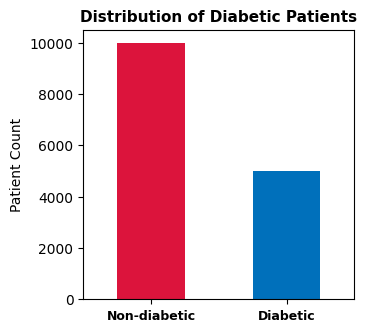

In [ ]:
# plot a graph
import matplotlib.pyplot as plt
# specify style-sheet
plt.style.use('fast')

fig, ax = plt.subplots(figsize=(3.5, 3.5))
diabetes['Diabetic'].value_counts().plot.bar(
    ax = ax,
    color=['#DC143C', '#0070BB']
)

ax.set_title('Distribution of Diabetic Patients', weight='black', fontsize=11)
ax.set_ylabel('Patient Count')
ax.set_xticklabels(['Non-diabetic', 'Diabetic'], rotation=0, weight='black',
                   fontsize=9)
ax.set_xlabel('')
plt.show()

> 💡 **Insight**
+ As it is, from the graph above, the dataset contains _un-even_ distribution of diabetic and non-diabetic patients, hence it's imbalanced

## Compare the features to the label
> A [`boxplot`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.boxplot.html) will be used to compare neumerical features (luckily, all features are numerical in our case) with the categorical label, `Diabetic`

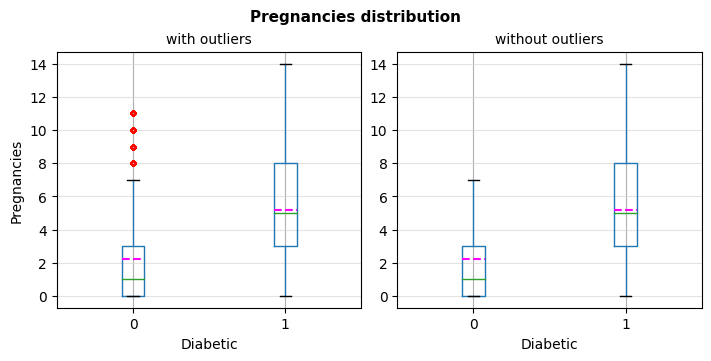

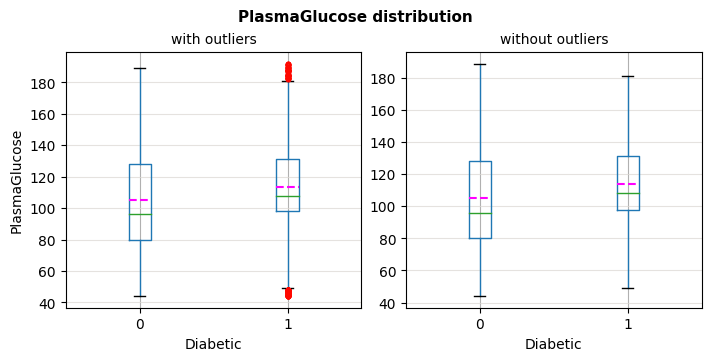

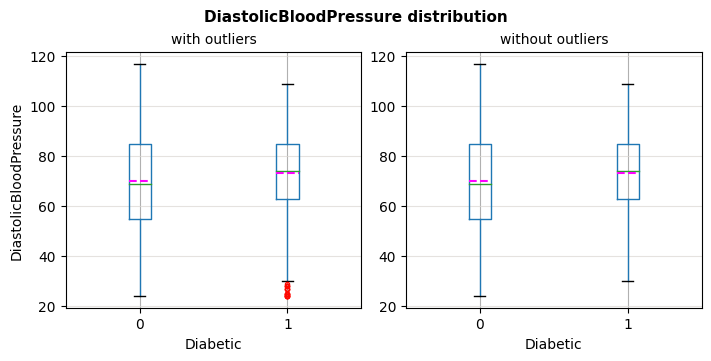

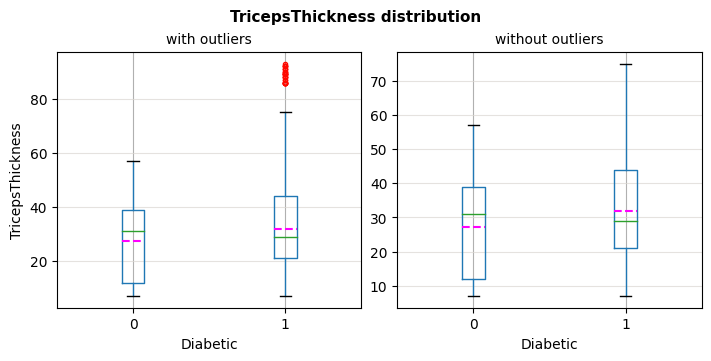

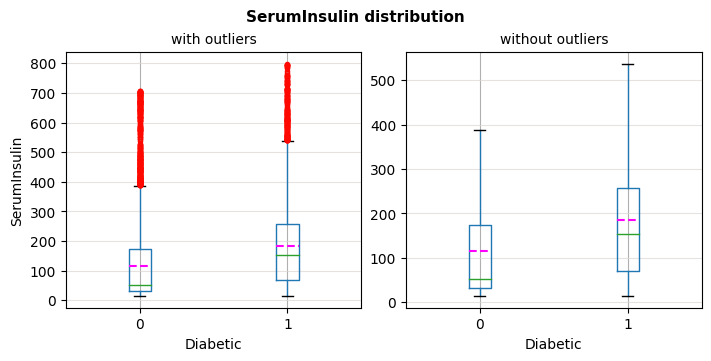

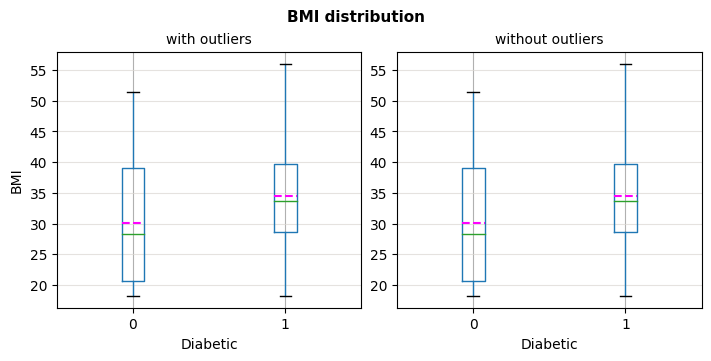

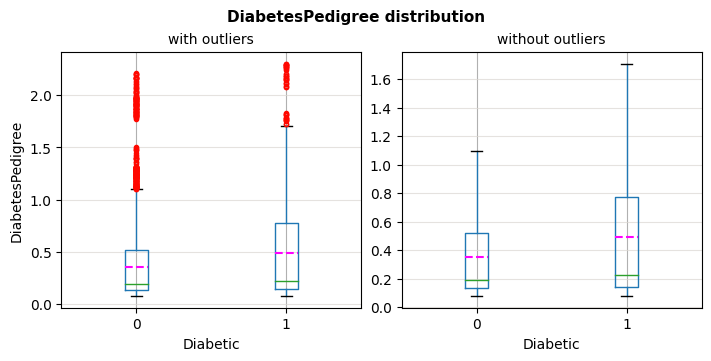

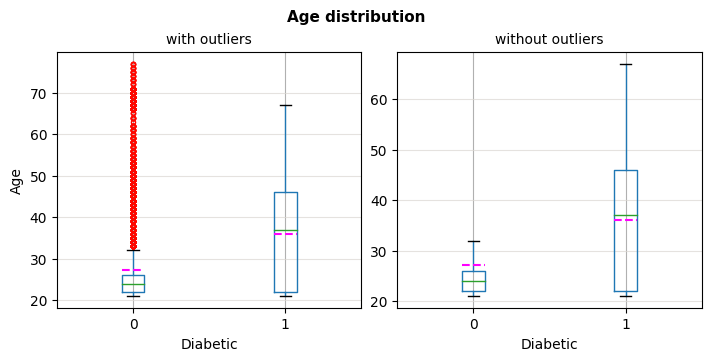

In [ ]:
# import matplotlib
import matplotlib.pyplot as plt

# use a for loop for that:
for col in features:
  # Create subplot
  fig, axs = plt.subplots(1, 2, figsize=(7, 3.5), layout='constrained')

  # Plot boxplot 0:
  diabetes.boxplot(column=col,
                  by='Diabetic',
                  flierprops = dict(markeredgecolor="#FF0800", marker="."),
                  meanprops=dict(color="#FF00FF", linestyle="--", linewidth=1.5),
                  showmeans=True,
                  meanline=True,
                  ax = axs[0])

  axs[0].set_title('with outliers', fontsize=10)
  axs[0].set_ylabel(col)
  axs[0].set_xlabel('Diabetic')
  axs[0].grid(axis="y", color="#dbd7d2", alpha=0.7)

  # Plot boxplot 1:
  diabetes.boxplot(column=col,
                  showfliers=False,
                  by='Diabetic',
                  flierprops = dict(markeredgecolor="#FF0800", marker="."),
                  meanprops=dict(color="#FF00FF", linestyle="--", linewidth=1.5),
                  showmeans=True,
                  meanline=True,
                  ax = axs[1])

  axs[1].set_title('without outliers', fontsize=10)
  axs[1].grid(axis='y', color='#dbd7d2', alpha=0.7)

  plt.suptitle(f'{col} distribution', fontsize=11, weight='black')
  plt.show()
  print('\n')

> ✋ **Disclaimer**
+ Note that the `Age` column will be considered as a _categorical_ feature when pre-processing (_encoding_)

# **Conclusion**
> 💡 **Insight**
+ It is safe to say that all the features are predictive of a diabetic and a non-diabetic case, since there is a noticeable difference in the distribution for each label value.
+ In particular, `Pregnancies`, `SerumInsulin` and `Age` show markedly different distributions for diabetic patients than for non-diabetic patients.
+ The task involves an _imbalanced_ dataset